In [53]:
#importing libraries and Reading the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

In [54]:
df=pd.read_csv("train.csv")
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [55]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [56]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [61]:
#descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


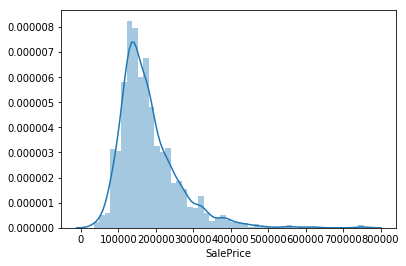

In [62]:
#histogram
sns.distplot(df['SalePrice']);

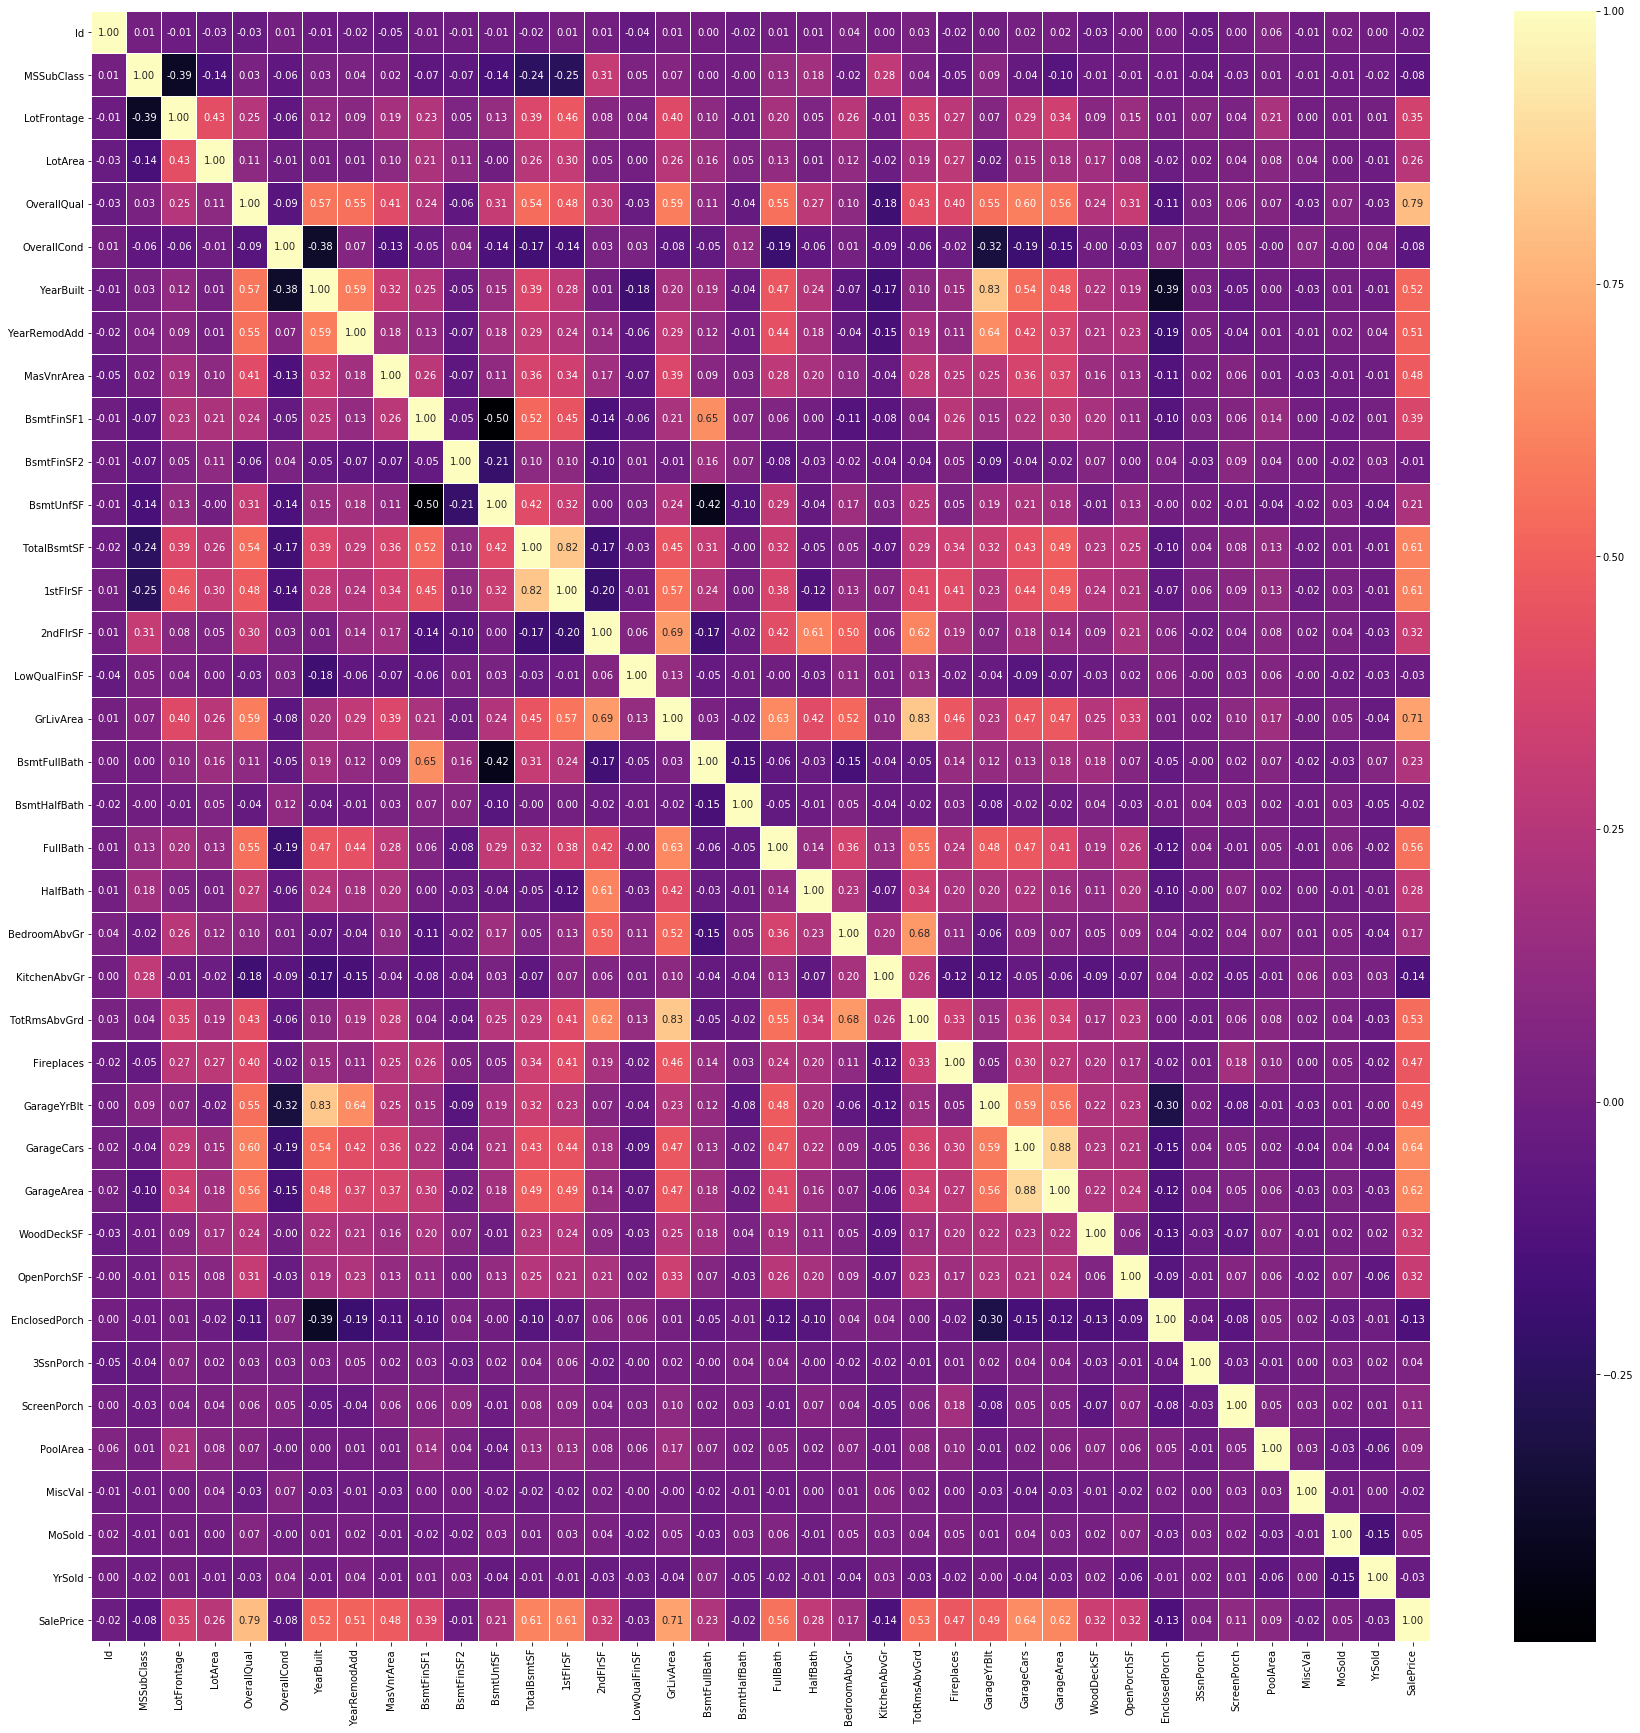

In [60]:
fig,ax=plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.show()

In [49]:
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
df= df[features]
df.head()


,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [5]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+",")

There are 7 columns:
LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
LotArea         1460 non-null int64
YearBuilt       1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
FullBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


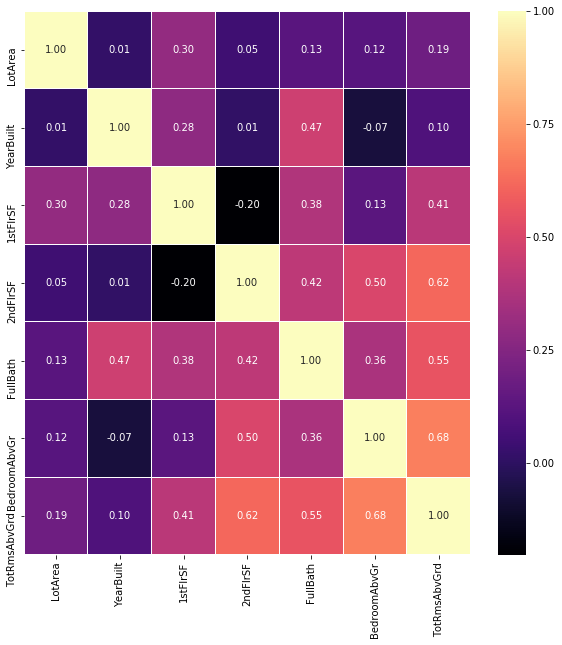

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.show()

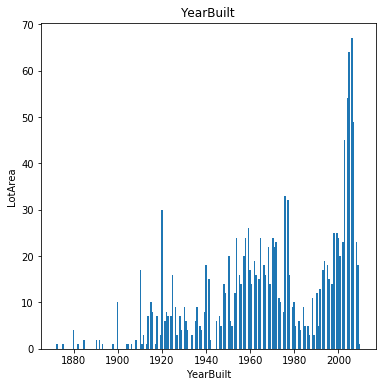

In [9]:
df["YearBuilt"].plot(kind='hist',bins=200,figsize=(6,6))
plt.title("YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("LotArea")
plt.show()

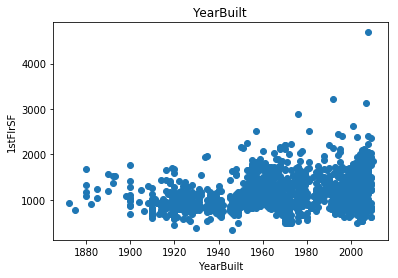

In [10]:
plt.scatter(df["YearBuilt"],df["1stFlrSF"])

plt.title("YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("1stFlrSF")
plt.show()

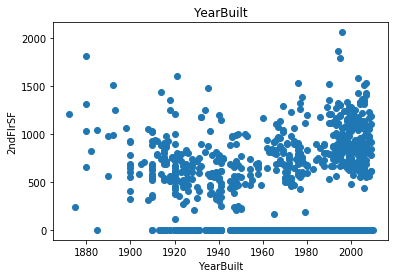

In [11]:
plt.scatter(df["YearBuilt"],df["2ndFlrSF"])
plt.title("YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("2ndFlrSF")
plt.show()

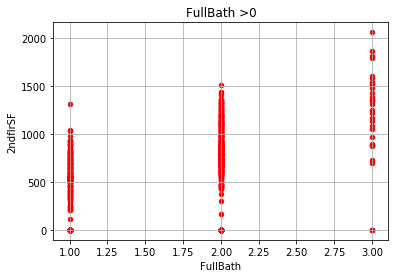

In [12]:
df[df['FullBath'] >0].plot(kind='scatter',x='FullBath',y='2ndFlrSF',color='red')
plt.xlabel("FullBath")
plt.ylabel("2ndflrSF")
plt.title("FullBath >0")
plt.grid(True)
plt.show()

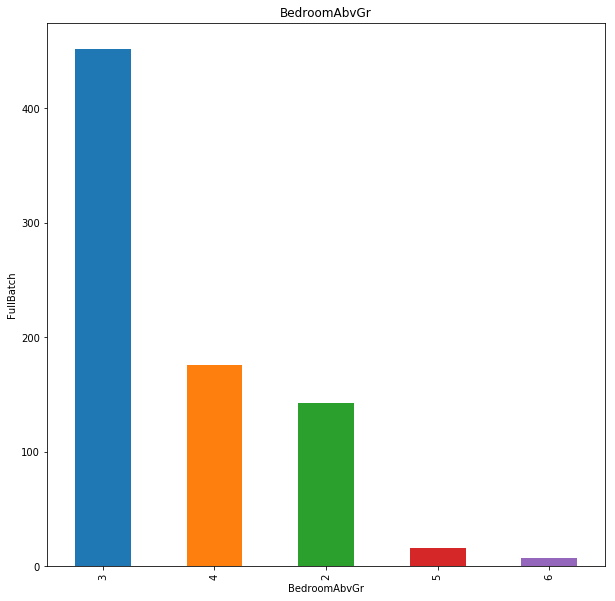

In [13]:
s = df[df["FullBath"] >1]["BedroomAbvGr"].value_counts().head(5)
plt.title("BedroomAbvGr")
s.plot(kind='bar',figsize=(10,10))
plt.xlabel("BedroomAbvGr")
plt.ylabel("FullBatch")
plt.show()

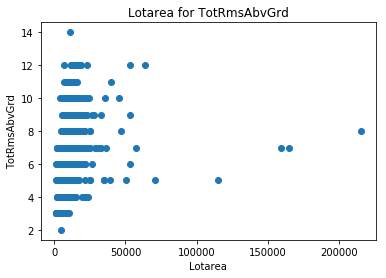

In [14]:
plt.scatter(df["LotArea"],df.TotRmsAbvGrd)
plt.xlabel("Lotarea")
plt.ylabel("TotRmsAbvGrd")
plt.title("Lotarea for TotRmsAbvGrd")
plt.show()

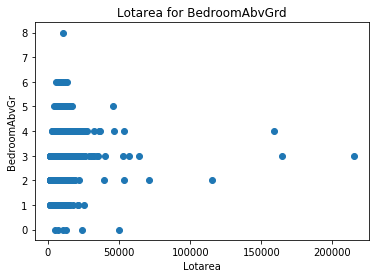

In [15]:
plt.scatter(df["LotArea"],df.BedroomAbvGr)
plt.xlabel("Lotarea")
plt.ylabel("BedroomAbvGr")
plt.title("Lotarea for BedroomAbvGrd")
plt.show()

## <a id='regression'> REGRESSION ALGORITHMS </a>

### <a id='prepareForRegression'>Preparing Data for Regression</a>

In [20]:
import pandas as pd
#reading the dataset
df=pd.read_csv("train.csv",sep = ",")
# Create target object and call it y
y = df.SalePrice.values
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = df[features]

In [21]:
#separating train (80%) and test (20%) sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scalerX=MinMaxScaler(feature_range=(0,1))
x_train[x_train.columns]=scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=scalerX.transform(x_test[x_test.columns])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A va

### <a id=' linearRegression'>Linear Regression</a>

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_head_lr=lr.predict(x_test)

print("real value of y_test[1]:"+str(y_test[1]) + "-> the predict:" +str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score:",r2_score(y_test,y_head_lr))

y_head_lr_train=lr.predict(x_train)
print("r_square score (train dataset):",r2_score(y_train,y_head_lr_train))

real value of y_test[1]:325000-> the predict:[311277.41645765]
real value of y_test[2]: 115000 -> the predict: [105718.75486464]
r_square score: 0.7393077072976806
r_square score (train dataset): 0.6929122152210525


### <a id ="randomForestRegression">Random Forest Regresssion</a>

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)
y_head_rfr=rfr.predict(x_test)

from sklearn.metrics import r2_score
print("r_square score:",r2_score(y_test,y_head_rfr))
print("real value of y_test[1]:" +str(y_test[1])+"-> the predict:"+str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]:" +str(y_test[2])+"-> the predict:"+str(rfr.predict(x_test.iloc[[2],:])))

y_head_rf_train=rfr.predict(x_train)
print("r_square score (train dataset):",r2_score(y_train,y_head_rf_train))

r_square score: 0.8593283780436709
real value of y_test[1]:325000-> the predict:[348370.97]
real value of y_test[2]:115000-> the predict:[102143.]
r_square score (train dataset): 0.9707303097974801


### <a id="DecisionTreeRegression">Decision Tree Regression </a>

In [25]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
y_head_dtr=dtr.predict(x_test)

from sklearn.metrics import r2_score
print("r_square score:",r2_score(y_test,y_head_dtr))
print("real value of y_test[1]:" +str(y_test[1])+ "-> the predict" +str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]:" +str(y_test[2])+ "-> the predict"+ str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train=dtr.predict(x_train)
print("r_square score (train dataset):",r2_score(y_train,y_head_dtr_train))


r_square score: 0.7185836006018234
real value of y_test[1]:325000-> the predict[412500.]
real value of y_test[2]:115000-> the predict[87500.]
r_square score (train dataset): 0.9999710037007745


### <a id='comparisonOfRegression'>Comparison of Regression Algorithms</a>

* Linear regression and random forest regression algorithms were better than decision tree regression algorithm.

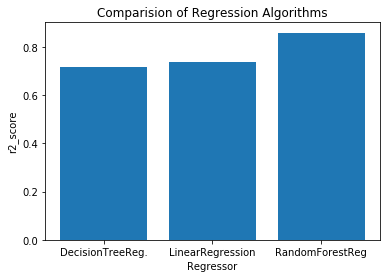

In [26]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x=["LinearRegression","RandomForestReg","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparision of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()


# Creating a Model For the Competition

Build a Random Forest model and train it on all of **X** and **y**.  

In [68]:
import pandas as pd
#reading the dataset
df=pd.read_csv("train.csv",sep = ",")
# Create target object and call it y
y = df.SalePrice.values
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = df[features]

In [85]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rfr_full_data =RandomForestRegressor(random_state=0)

# fit RandomForest_model_on_full_data on all data from the training data
rfr_full_data.fit(X,y)


C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## <a id="makepred">Make Predictions</a>
Read the file of "test" data. And apply the model to make predictions

In [86]:
test_data=pd.read_csv("test.csv",sep = ",")

In [87]:
features=['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']


In [88]:
test_X = test_data[features]

In [90]:
# make predictions which we will submit. 
test_preds=rfr_full_data.predict(test_X)
test_preds

array([129585., 154280., 187270., ..., 160320., 127150., 218461.])

In [91]:
output = pd.DataFrame({'Id': test_data.Id,
                     'SalePrice': test_preds})
output.to_csv('submission1.csv', index=False)
#print(output.shape)